<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20045_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Derivation of the Linear Operator $H$ and Mode Shapes**

### **1. Physical Boundary Conditions**
For a beam of length $L$ in a **Pinned-Free** configuration, the boundary conditions are defined as follows:

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (Zero bending moment)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (Zero bending moment)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (Zero shear force)



---

### **2. The Linear Operator $H$**
The transverse vibration of the beam is governed by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

Assuming the axial force $P_o = 0$, the linear operator $H$ is defined as:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

---

### **3. Eigenvalue Problem and Mode Shape Derivation**
We assume a harmonic solution of the form $y(x, t) = \psi(x) e^{i\omega t}$. Substituting this into the unforced, undamped equation yields the eigenvalue problem:
$$H\psi = \omega^2 \psi$$

Let $\beta^4 = \frac{\omega^2 \rho A}{EI}$. The general solution for the mode shape $\psi(x)$ is:
$$\psi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)$$

#### **Applying Boundary Conditions at $x = 0$:**
1. $\psi(0) = 0 \implies B + D = 0 \implies D = -B$
2. $\psi''(0) = 0 \implies \beta^2(-B + D) = 0 \implies -B - B = 0 \implies B = 0, D = 0$

Thus, the mode shape simplifies to:
$$\psi(x) = A \sin(\beta x) + C \sinh(\beta x)$$

---

### **4. Characteristic Equation**
Applying the boundary conditions at the free end $x = L$:

1. **Moment condition:** $\psi''(L) = 0 \implies -\beta^2 A \sin(\beta L) + \beta^2 C \sinh(\beta L) = 0$
   $$C = A \frac{\sin(\beta L)}{\sinh(\beta L)}$$

2. **Shear condition:** $\psi'''(L) = 0 \implies -\beta^3 A \cos(\beta L) + \beta^3 C \cosh(\beta L) = 0$

Substituting $C$ into the shear condition:
$$-A \cos(\beta L) + A \frac{\sin(\beta L)}{\sinh(\beta L)} \cosh(\beta L) = 0$$

Dividing by $A$ and rearranging gives the **Characteristic Equation**:
$$\tan(\beta L) = \tanh(\beta L)$$

---

### **5. Final Modal Functions**
The $k$-th mode shape $\psi_k(x)$ is defined as:
$$\psi_k(x) = A_k \left[ \sin(\beta_k x) + \frac{\sin(\beta_k L)}{\sinh(\beta_k L)} \sinh(\beta_k x) \right]$$

The first two numerical roots for $\beta_k L$ are:
* **Mode 1:** $\beta_1 L \approx 3.9266$
* **Mode 2:** $\beta_2 L \approx 7.0686$

Mode 1 Eigenvalue (beta*L): 3.9266 | Frequency: 53.00 Hz
Mode 2 Eigenvalue (beta*L): 7.0686 | Frequency: 171.75 Hz


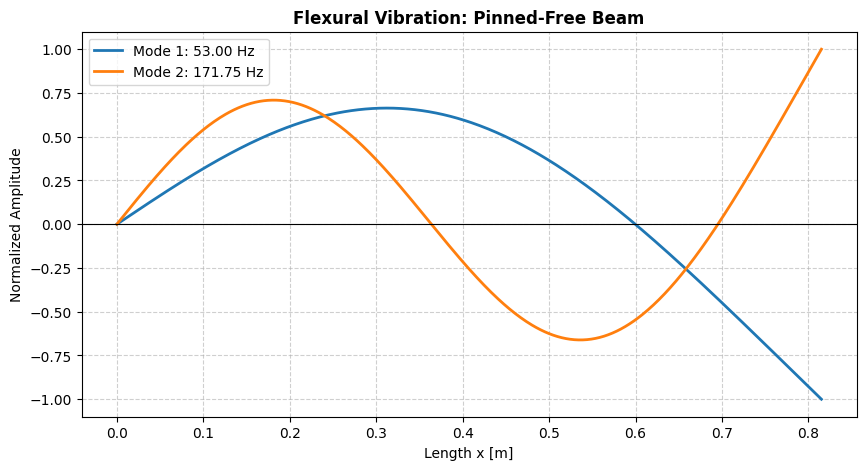

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

class BeamAnalyzer:
    """Class to perform modal analysis on a Pinned-Free beam."""

    def __init__(self, L, m, E, width, thickness):
        self.L = L
        self.rho_A = m / L
        self.I = (width * thickness**3) / 12
        self.EI = E * self.I
        self.stiffness_const = np.sqrt(self.EI / self.rho_A)

    def characteristic_function(self, betaL):
        """Characteristic equation for Pinned-Free beam: tan(betaL) = tanh(betaL)"""
        # Formulated as sin(x)cosh(x) - cos(x)sinh(x) = 0 for numerical stability
        return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

    def solve_eigenvalues(self, n_modes=2):
        """Finds the first n roots of the characteristic equation."""
        roots = []
        # Scanning intervals to locate sign changes for the solver
        search_points = np.linspace(0.1, 15, 1000)
        for i in range(len(search_points) - 1):
            a, b = search_points[i], search_points[i+1]
            if self.characteristic_function(a) * self.characteristic_function(b) < 0:
                roots.append(brentq(self.characteristic_function, a, b))
            if len(roots) == n_modes:
                break
        return np.array(roots)

    def compute_mode(self, x, betaL):
        """Calculates and normalizes the mode shape."""
        beta = betaL / self.L
        # The coefficient ratio (C/A) for Pinned-Free
        sigma = np.sin(betaL) / np.sinh(betaL)
        psi = np.sin(beta * x) + sigma * np.sinh(beta * x)
        return psi / np.max(np.abs(psi))

    def get_freq_hz(self, betaL):
        """Converts eigenvalue to natural frequency in Hertz."""
        omega = (betaL / self.L)**2 * self.stiffness_const
        return omega / (2 * np.pi)

# --- Configuration and Execution ---
params = {
    'L': 0.815, 'm': 1.65, 'E': 2e11,
    'width': 0.025, 'thickness': 0.01
}

beam = BeamAnalyzer(params['L'], params['m'], params['E'], params['width'], params['thickness'])
roots = beam.solve_eigenvalues(2)

# Plotting Results
x_vals = np.linspace(0, params['L'], 500)
plt.figure(figsize=(10, 5))

for i, root in enumerate(roots):
    f_hz = beam.get_freq_hz(root)
    y_mode = beam.compute_mode(x_vals, root)
    plt.plot(x_vals, y_mode, label=f'Mode {i+1}: {f_hz:.2f} Hz', linewidth=2)
    print(f"Mode {i+1} Eigenvalue (beta*L): {root:.4f} | Frequency: {f_hz:.2f} Hz")

plt.title('Flexural Vibration: Pinned-Free Beam', fontweight='bold')
plt.xlabel('Length x [m]')
plt.ylabel('Normalized Amplitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()

## **Derivation of the Decoupled 2-DOF Modal Model with Attachments**

---

## **1. Physical System Parameters**

### **Beam Properties**

- Length: $L = 0.815 \ \text{m}$
- Total Mass: $m_{\text{beam}} = 1.65 \ \text{kg}$
- Width: $b = 0.025 \ \text{m}$
- Thickness: $h = 0.01 \ \text{m}$
- Young’s Modulus: $E = 2 \times 10^{11} \ \text{Pa}$

Cross-sectional area:

$$
A = bh
$$

Second moment of area:

$$
I = \frac{bh^3}{12}
$$

Flexural rigidity:

$$
EI \approx 416.67 \ \text{Nm}^2
$$

---

### **Discrete Attachments**

- Spring stiffness:  
  $$
  k_s = 3800 \ \text{N/m}
  $$
  Located at $l_s = 0.75 \ \text{m}$

- Effective spring mass (including $1/3$ spring mass + attachment):
  $$
  m_{s,\text{eff}} = 0.1383 \ \text{kg}
  $$

- Exciter mass:
  $$
  m_e = 4.2 \ \text{kg}
  $$
  Located at $l_e = 0.4 \ \text{m}$

- Damper mass:
  $$
  m_d = 0.53 \ \text{kg}
  $$
  Located at $l_d = 0.2 \ \text{m}$

---

## **2. Modal Approximation**

The transverse displacement is approximated using the first two flexural modes of the pinned-free beam:

$$
y(x,t) = \psi_1(x) z_1(t) + \psi_2(x) z_2(t)
$$

where:

- $\psi_1(x), \psi_2(x)$ = mode shapes  
- $z_1(t), z_2(t)$ = modal coordinates  

Because the modes are orthogonal, the system decouples in modal space.

---

## **3. Modal Mass Matrix**

The total modal mass for mode $k$ includes:

1. Distributed beam mass  
2. Discrete inertial contributions  

$$
M_k =
\int_0^L \rho A \, \psi_k^2(x)\, dx
+ m_{s,\text{eff}} \psi_k^2(l_s)
+ m_e \psi_k^2(l_e)
+ m_d \psi_k^2(l_d)
$$

Since the modes are orthogonal:

$$
\mathbf{M} =
\begin{bmatrix}
M_1 & 0 \\
0 & M_2
\end{bmatrix}
$$

---

## **4. Modal Stiffness Matrix**

The modal stiffness consists of:

1. Internal bending energy of the beam  
2. External spring potential energy  

$$
K_k =
\int_0^L
EI \left( \psi_k''(x) \right)^2 dx
+
k_s \psi_k^2(l_s)
$$

Using the beam eigenvalue relation:

$$
EI \psi_k'''' = \rho A \omega_{\text{beam},k}^2 \psi_k
$$

The internal stiffness term simplifies to:

$$
\omega_{\text{beam},k}^2 M_{\text{beam},k}
$$

Thus the stiffness matrix is diagonal:

$$
\mathbf{K} =
\begin{bmatrix}
K_1 & 0 \\
0 & K_2
\end{bmatrix}
$$

---

## **5. Equations of Motion in Modal Space**

The decoupled 2-DOF system becomes:

$$
\mathbf{M}\ddot{\mathbf{z}} + \mathbf{K}\mathbf{z} = \mathbf{Q}(t)
$$

Expanded form:

$$
\begin{bmatrix}
M_1 & 0 \\
0 & M_2
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_1 & 0 \\
0 & K_2
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
F(t)\psi_1(l_e) \\
F(t)\psi_2(l_e)
\end{Bmatrix}
$$

---

## **6. Natural Frequencies of the Coupled System**

For each mode:

$$
\omega_{n,k} = \sqrt{\frac{K_k}{M_k}}
$$

In Hz:

$$
f_{n,k} = \frac{1}{2\pi}
\sqrt{\frac{K_k}{M_k}}
$$

---

### ✔ Final Result

The continuous beam with discrete attachments reduces to **two independent second-order modal equations**, fully described by:

- Modal masses $M_1, M_2$
- Modal stiffnesses $K_1, K_2$

This forms the decoupled 2-DOF representation of the physical system.


In [2]:
# ============================================================
# DECOPLED 2-DOF MODAL MODEL WITH DISCRETE ATTACHMENTS
# ============================================================

import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ============================================================
# 1️⃣  BEAM & MATERIAL PROPERTIES
# ============================================================

L = 0.815                    # Beam length (m)
m_beam = 1.65                # Total beam mass (kg)
rho_A = m_beam / L           # Linear mass density (kg/m)

E = 2e11                     # Young's Modulus (Pa)
b = 0.025                    # Width (m)
h = 0.01                     # Thickness (m)

I = (b * h**3) / 12          # Second moment of area
EI = E * I                   # Flexural rigidity

# ============================================================
# 2️⃣  DISCRETE ATTACHMENTS
# ============================================================

ks = 3800                    # Spring stiffness (N/m)
ls = 0.75                    # Spring location (m)
ms_eff = 0.1383              # Effective spring mass (kg)

me = 4.2                     # Exciter mass (kg)
le = 0.4                     # Exciter location (m)

md = 0.53                    # Damper mass (kg)
ld = 0.2                     # Damper location (m)

# ============================================================
# 3️⃣  CHARACTERISTIC EQUATION (Pinned-Free Beam)
# ============================================================

def characteristic_eq(betaL):
    return np.sin(betaL)*np.cosh(betaL) - np.cos(betaL)*np.sinh(betaL)

# Find first two roots
roots = []
search_space = np.linspace(0.1, 12, 2000)

for i in range(len(search_space)-1):
    if np.sign(characteristic_eq(search_space[i])) != np.sign(characteristic_eq(search_space[i+1])):
        root = brentq(characteristic_eq, search_space[i], search_space[i+1])
        roots.append(root)
        if len(roots) == 2:
            break

# ============================================================
# 4️⃣  MODE SHAPES & DERIVATIVES
# ============================================================

def psi(x, r):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return np.sin(beta*x) + sigma*np.sinh(beta*x)

def psi_dd(x, r):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return beta**2 * (-np.sin(beta*x) + sigma*np.sinh(beta*x))

# ============================================================
# 5️⃣  MODAL MASS & STIFFNESS CALCULATION
# ============================================================

Mk_list = []
Kk_list = []

for r in roots:

    # ---- Beam Mass Contribution ----
    M_beam, _ = quad(lambda x: rho_A * psi(x, r)**2, 0, L)

    # ---- Discrete Mass Contribution ----
    M_discrete = (
        ms_eff * psi(ls, r)**2 +
        me     * psi(le, r)**2 +
        md     * psi(ld, r)**2
    )

    Mk = M_beam + M_discrete

    # ---- Beam Stiffness Contribution ----
    K_beam, _ = quad(lambda x: EI * psi_dd(x, r)**2, 0, L)

    # ---- Spring Stiffness Contribution ----
    K_spring = ks * psi(ls, r)**2

    Kk = K_beam + K_spring

    Mk_list.append(Mk)
    Kk_list.append(Kk)

# ============================================================
# 6️⃣  ASSEMBLE MODAL MATRICES
# ============================================================

M_matrix = np.diag(Mk_list)
K_matrix = np.diag(Kk_list)

# ============================================================
# 7️⃣  NATURAL FREQUENCIES
# ============================================================

freqs_hz = [
    np.sqrt(Kk / Mk) / (2*np.pi)
    for Mk, Kk in zip(Mk_list, Kk_list)
]

# ============================================================
# 8️⃣  RESULTS
# ============================================================

print("\nModal Mass Matrix (M):")
print(np.round(M_matrix, 4))

print("\nModal Stiffness Matrix (K):")
print(np.round(K_matrix, 2))

print("\nEstimated Natural Frequencies:")
for i, f in enumerate(freqs_hz):
    print(f"Mode {i+1}: {f:.3f} Hz")



Modal Mass Matrix (M):
[[4.2735 0.    ]
 [0.     1.7822]]

Modal Stiffness Matrix (K):
[[ 94998.54      0.  ]
 [     0.   962230.74]]

Estimated Natural Frequencies:
Mode 1: 23.729 Hz
Mode 2: 116.943 Hz


## **Rigid Body Approximation of the First Mode (1-DOF Model)**

---

## **1. Physical Interpretation**

The flexural (Euler–Bernoulli) model captures bending behavior of the beam.  
However, the true first mode of this pinned–spring system behaves predominantly like a **rigid-body rotation** about the pinned end.

The external spring strongly influences this motion, causing the beam to behave like a swinging rigid rod rather than a bending structure.

To capture this behavior more accurately, we approximate the beam as a:

> **Rigid rod of length $L$ rotating about the pinned end**

The generalized coordinate is the angular displacement:

$$
\theta(t)
$$

---

## **2. Equivalent Rotational System Parameters**

### **(a) Mass Moment of Inertia About the Pivot**

The total inertia about $x=0$ includes:

- Beam distributed mass  
- Effective spring mass  
- Exciter mass  
- Damper mass  

$$
J_o =
\frac{1}{3} m_{\text{beam}} L^2
+ m_{s,\text{eff}} l_s^2
+ m_e l_e^2
+ m_d l_d^2
$$

Where:

- $\frac{1}{3} m_{\text{beam}} L^2$ → inertia of a uniform rod about one end  
- $m_i l_i^2$ → point mass inertia contributions  

---

### **(b) Equivalent Rotational Stiffness**

The helical spring located at $l_s$ provides restoring torque.

For small angular displacements:

$$
x \approx l_s \theta
$$

Spring force:

$$
F_s = k_s (l_s \theta)
$$

Restoring torque about the pivot:

$$
M_s = F_s l_s = k_s l_s^2 \theta
$$

Thus the equivalent rotational stiffness is:

$$
K_\theta = k_s l_s^2
$$

---

## **3. Equation of Motion (1-DOF Rotational System)**

Applying Newton’s Second Law for rotation:

$$
\sum M_o = J_o \ddot{\theta}
$$

The governing equation becomes:

$$
J_o \ddot{\theta} + K_\theta \theta = M_{\text{ext}}(t)
$$

Substituting the full expressions:

$$
\left(
\frac{1}{3} m_{\text{beam}} L^2
+ m_{s,\text{eff}} l_s^2
+ m_e l_e^2
+ m_d l_d^2
\right)
\ddot{\theta}
+
(k_s l_s^2)\theta
=
F(t) l_e
$$

---

## **4. Natural Frequency of the Rigid Mode**

The rigid-body natural frequency in rad/s:

$$
\omega_{n,\text{rigid}} =
\sqrt{\frac{K_\theta}{J_o}}
$$

Substituting:

$$
\omega_{n,\text{rigid}} =
\sqrt{
\frac{k_s l_s^2}
{\frac{1}{3} m_{\text{beam}} L^2
+ m_{s,\text{eff}} l_s^2
+ m_e l_e^2
+ m_d l_d^2}
}
$$

In Hertz:

$$
f_{n,1} =
\frac{1}{2\pi}
\sqrt{
\frac{k_s l_s^2}{J_o}
}
$$

---

## **5. Engineering Insight**

This 1-DOF rigid-body approximation:

- Captures the low-frequency “swinging” behavior  
- Explains why the experimental first mode is lower than the pure flexural prediction  
- Avoids artificial over-stiffening from the bending-only model  

It provides a more physically realistic estimate of the fundamental mode of the system.


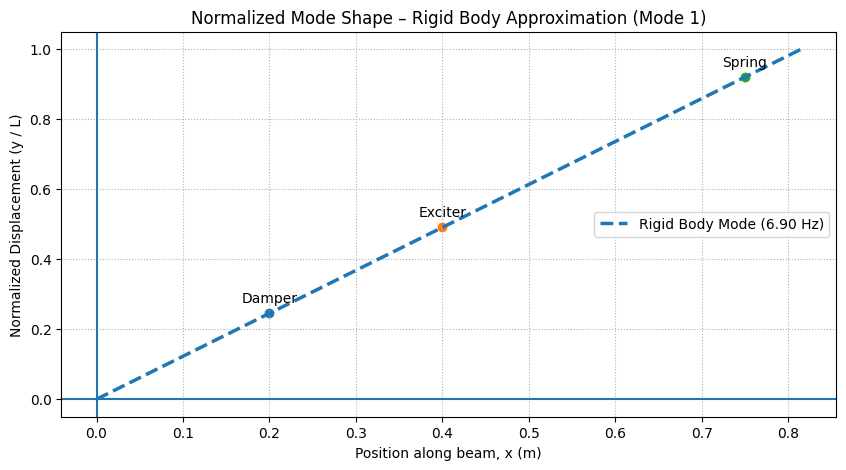

Mass Moment of Inertia (Jo): 1.1363 kg·m²
Equivalent Rotational Stiffness (Kθ): 2137.50 N·m/rad
Rigid Body Natural Frequency: 6.903 Hz


In [3]:
# ============================================================
# RIGID BODY APPROXIMATION – FIRST MODE (1-DOF MODEL)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣  SYSTEM PARAMETERS
# ============================================================

# Beam properties
L = 0.815                 # Beam length (m)
m_beam = 1.65             # Beam mass (kg)

# Spring properties
ks = 3800                 # Spring stiffness (N/m)
ls = 0.75                 # Spring location (m)
ms_eff = 0.1383           # Effective spring mass (kg)

# Discrete attachments
me = 4.2                  # Exciter mass (kg)
le = 0.4                  # Exciter location (m)

md = 0.53                 # Damper mass (kg)
ld = 0.2                  # Damper location (m)

# ============================================================
# 2️⃣  RIGID BODY CALCULATIONS
# ============================================================

# ---- Mass Moment of Inertia about pivot (x = 0) ----
J_beam    = (1/3) * m_beam * L**2
J_spring  = ms_eff * ls**2
J_exciter = me * le**2
J_damper  = md * ld**2

Jo = J_beam + J_spring + J_exciter + J_damper

# ---- Equivalent Rotational Stiffness ----
K_theta = ks * ls**2

# ---- Natural Frequency ----
omega_rigid = np.sqrt(K_theta / Jo)       # rad/s
freq_rigid  = omega_rigid / (2 * np.pi)   # Hz

# ============================================================
# 3️⃣  RIGID BODY MODE SHAPE
# ============================================================

x_vals = np.linspace(0, L, 200)

# For rigid rotation: y = θx
# Normalized shape (max displacement = 1 at tip)
y_rigid = x_vals / L

# ============================================================
# 4️⃣  PLOTTING
# ============================================================

plt.figure(figsize=(10, 5))

plt.plot(
    x_vals,
    y_rigid,
    linestyle='--',
    linewidth=2.5,
    label=f'Rigid Body Mode ({freq_rigid:.2f} Hz)'
)

# Mark attachment locations
attachment_positions = [ld, le, ls]
attachment_labels = ['Damper', 'Exciter', 'Spring']

for pos, label in zip(attachment_positions, attachment_labels):
    plt.scatter(pos, pos/L)
    plt.annotate(label, (pos, pos/L),
                 textcoords="offset points",
                 xytext=(0, 8),
                 ha='center')

# Formatting
plt.axhline(0)
plt.axvline(0)

plt.title('Normalized Mode Shape – Rigid Body Approximation (Mode 1)')
plt.xlabel('Position along beam, x (m)')
plt.ylabel('Normalized Displacement (y / L)')
plt.grid(True, linestyle=':')
plt.legend()

plt.show()

# ============================================================
# 5️⃣  OUTPUT
# ============================================================

print(f"Mass Moment of Inertia (Jo): {Jo:.4f} kg·m²")
print(f"Equivalent Rotational Stiffness (Kθ): {K_theta:.2f} N·m/rad")
print(f"Rigid Body Natural Frequency: {freq_rigid:.3f} Hz")


## **Hybrid 2-DOF Mathematical Model**

---

## **1. Physical Motivation**

The experimental behavior of the system shows two dominant motions:

1. A **low-frequency rigid-body swing** about the pinned end.
2. A **higher-frequency elastic bending mode** of the beam.

To accurately capture both behaviors, we construct a **hybrid coordinate basis** combining:

- A rigid-body mode  
- A flexural (elastic) mode  

---

## **2. Hybrid Modal Basis**

The total transverse displacement is approximated as:

$$
y(x,t) = \psi_1(x) z_1(t) + \psi_2(x) z_2(t)
$$

where:

### **Mode 1 – Rigid Body Mode**
Rotation about the pivot:

$$
\psi_1(x) = \frac{x}{L}
$$

---

### **Mode 2 – First Flexural Mode (Pinned–Free Beam)**

$$
\psi_2(x) =
\sin(\beta_1 x)
+
\frac{\sin(\beta_1 L)}{\sinh(\beta_1 L)}
\sinh(\beta_1 x)
$$

Here:

- $\beta_1$ = first root of the characteristic equation  
- $z_1(t), z_2(t)$ = generalized modal coordinates  

---

## **3. Hybrid Modal Mass Matrix**

The general mass matrix element is:

$$
M_{ij}
=
\int_0^L
\rho A \, \psi_i(x)\psi_j(x) \, dx
+
\sum m_k \psi_i(x_k)\psi_j(x_k)
$$

where the summation includes:

- Effective spring mass $m_{s,\text{eff}}$
- Exciter mass $m_e$
- Damper mass $m_d$

---

### **Simplified (Decoupled) Approximation**

Assuming weak interaction between rigid and flexural modes:

$$
M_{12} \approx 0
$$

The diagonal terms become:

- **Rigid Mode Equivalent Mass**

$$
M_{11} \approx \frac{J_o}{L^2}
$$

where

$$
J_o =
\frac{1}{3} m_{\text{beam}} L^2
+
m_{s,\text{eff}} l_s^2
+
m_e l_e^2
+
m_d l_d^2
$$

- **Flexural Mode Modal Mass**

$$
M_{22}
=
\int_0^L \rho A \psi_2^2(x) dx
+
\sum m_k \psi_2^2(x_k)
$$

---

## **4. Hybrid Modal Stiffness Matrix**

The general stiffness term is:

$$
K_{ij}
=
\int_0^L
EI \psi_i''(x)\psi_j''(x) dx
+
\sum k_k \psi_i(x_k)\psi_j(x_k)
$$

---

### **Rigid Mode Stiffness**

Since:

$$
\psi_1''(x) = 0
$$

The rigid mode has no bending stiffness contribution.

Its stiffness comes purely from the spring:

$$
K_{11}
=
k_s \psi_1^2(l_s)
=
k_s \left( \frac{l_s}{L} \right)^2
$$

---

### **Flexural Mode Stiffness**

For the elastic mode:

$$
K_{22}
=
\int_0^L EI \left( \psi_2''(x) \right)^2 dx
+
k_s \psi_2^2(l_s)
$$

This includes:

- Beam bending strain energy  
- External spring energy  

---

## **5. Final Decoupled 2-DOF Matrix Form**

Neglecting cross-coupling terms:

$$
\begin{bmatrix}
M_{11} & 0 \\
0 & M_{22}
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_{11} & 0 \\
0 & K_{22}
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
Q_1(t) \\
Q_2(t)
\end{Bmatrix}
$$

---

## **6. Natural Frequencies of the Hybrid Model**

### **Rigid-Dominant Frequency**

$$
f_{n,1}
=
\frac{1}{2\pi}
\sqrt{\frac{K_{11}}{M_{11}}}
$$

---

### **Flexural-Dominant Frequency**

$$
f_{n,2}
=
\frac{1}{2\pi}
\sqrt{\frac{K_{22}}{M_{22}}}
$$

---

## **7. Physical Interpretation**

This hybrid 2-DOF model captures:

- ✔ The low-frequency global swinging motion  
- ✔ The higher-frequency structural bending vibration  
- ✔ The influence of discrete masses and spring attachment  

It combines the advantages of:

- The rigid-body rotational model  
- The elastic beam theory  

Thus, it provides a physically meaningful and experimentally consistent representation of the system dynamics.


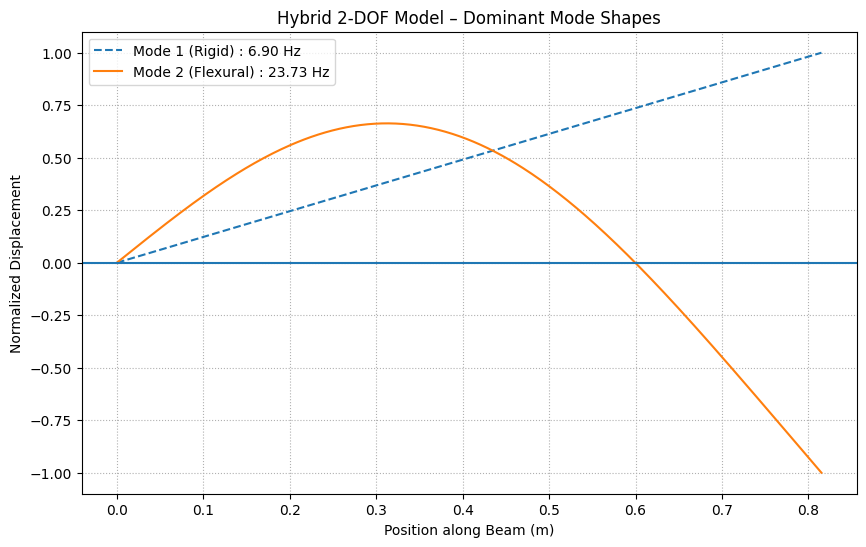


Hybrid Modal Mass Matrix (M):
[[1.7107 0.    ]
 [0.     4.2735]]

Hybrid Modal Stiffness Matrix (K):
[[ 3218.04     0.  ]
 [    0.   94998.54]]

Estimated Natural Frequencies:
Mode 1 (Rigid-Dominant)   = 6.903 Hz
Mode 2 (Flexural-Dominant)= 23.729 Hz


In [4]:
# ============================================================
# HYBRID 2-DOF MODEL
# (Rigid Body Mode + First Flexural Mode)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import quad

# ============================================================
# 1️⃣  SYSTEM PARAMETERS
# ============================================================

# Beam properties
L = 0.815
m_beam = 1.65
rho_A = m_beam / L

E = 2e11
b, h = 0.025, 0.01
I = (b * h**3) / 12
EI = E * I

# Discrete attachments
ks = 3800
ls = 0.75
ms_eff = 0.1383

me = 4.2
le = 0.4

md = 0.53
ld = 0.2

# ============================================================
# 2️⃣  MODE SHAPE DEFINITIONS
# ============================================================

# ------------------------------------------------------------
# Mode 1 : Rigid Body Rotation
# ------------------------------------------------------------

def psi1(x):
    return x / L


# ------------------------------------------------------------
# Mode 2 : First Flexural Mode (Pinned–Free)
# ------------------------------------------------------------

def characteristic_eq(betaL):
    return np.sin(betaL)*np.cosh(betaL) - np.cos(betaL)*np.sinh(betaL)

# Solve for first flexural root
betaL_root = brentq(characteristic_eq, 3.5, 4.5)
beta = betaL_root / L
sigma = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta*x) + sigma*np.sinh(beta*x)

def psi2_dd(x):
    return beta**2 * (-np.sin(beta*x) + sigma*np.sinh(beta*x))

# ============================================================
# 3️⃣  HYBRID MODAL MASS MATRIX
# ============================================================

# --- Mode 1 (Rigid Equivalent Mass) ---
J_beam    = (1/3) * m_beam * L**2
J_spring  = ms_eff * ls**2
J_exciter = me * le**2
J_damper  = md * ld**2

Jo = J_beam + J_spring + J_exciter + J_damper
M11 = Jo / L**2

# --- Mode 2 (Flexural Modal Mass) ---
M_beam_2, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)

M22 = (
    M_beam_2
    + ms_eff * psi2(ls)**2
    + me     * psi2(le)**2
    + md     * psi2(ld)**2
)

# ============================================================
# 4️⃣  HYBRID MODAL STIFFNESS MATRIX
# ============================================================

# --- Mode 1 (Rigid Stiffness from Spring Only) ---
K11 = ks * (ls**2) / (L**2)

# --- Mode 2 (Flexural Stiffness) ---
K_beam_2, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = K_beam_2 + ks * psi2(ls)**2

# ============================================================
# 5️⃣  ASSEMBLE HYBRID MATRICES
# ============================================================

M_hybrid = np.diag([M11, M22])
K_hybrid = np.diag([K11, K22])

# ============================================================
# 6️⃣  NATURAL FREQUENCIES
# ============================================================

fn1 = np.sqrt(K11 / M11) / (2*np.pi)
fn2 = np.sqrt(K22 / M22) / (2*np.pi)

# ============================================================
# 7️⃣  PLOT MODE SHAPES
# ============================================================

x_vals = np.linspace(0, L, 400)

y1 = psi1(x_vals)
y2 = psi2(x_vals)

# Normalize for comparison
y1_norm = y1 / np.max(np.abs(y1))
y2_norm = y2 / np.max(np.abs(y2))

plt.figure(figsize=(10, 6))

plt.plot(x_vals, y1_norm, linestyle='--',
         label=f'Mode 1 (Rigid) : {fn1:.2f} Hz')

plt.plot(x_vals, y2_norm,
         label=f'Mode 2 (Flexural) : {fn2:.2f} Hz')

plt.axhline(0)
plt.title('Hybrid 2-DOF Model – Dominant Mode Shapes')
plt.xlabel('Position along Beam (m)')
plt.ylabel('Normalized Displacement')
plt.grid(True, linestyle=':')
plt.legend()
plt.show()

# ============================================================
# 8️⃣  NUMERICAL RESULTS
# ============================================================

print("\nHybrid Modal Mass Matrix (M):")
print(np.round(M_hybrid, 4))

print("\nHybrid Modal Stiffness Matrix (K):")
print(np.round(K_hybrid, 2))

print(f"\nEstimated Natural Frequencies:")
print(f"Mode 1 (Rigid-Dominant)   = {fn1:.3f} Hz")
print(f"Mode 2 (Flexural-Dominant)= {fn2:.3f} Hz")


## Incorporating Damping into the Hybrid 2-DOF Model

### 1. Rayleigh Proportional Damping Formulation

To account for energy dissipation in the hybrid rigid–flexural system, Rayleigh proportional damping is adopted. The damping matrix $\mathbf{C}$ is expressed as:

$$
\mathbf{C} = \alpha \mathbf{M} + \beta \mathbf{K}
$$

For this system, stiffness-proportional damping is assumed:

$$
\alpha = 0
$$

Under this assumption, the modal damping ratio for mode $k$ becomes:

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$

---

### 2. Relationship Between Modal Damping Ratios

Since damping is proportional to natural frequency:

$$
\frac{\zeta_2}{\omega_2} = \frac{\zeta_1}{\omega_1}
$$

Therefore,

$$
\zeta_2 = \zeta_1 \left( \frac{\omega_2}{\omega_1} \right)
$$

---

### 3. Modal Damping Matrix Derivation

Because the hybrid modal basis produces a decoupled system, the damping matrix is diagonal:

$$
\mathbf{C} =
\begin{bmatrix}
C_{11} & 0 \\
0 & C_{22}
\end{bmatrix}
$$

The diagonal terms are given by:

$$
C_{kk} = 2 \zeta_k \omega_k M_{kk}
$$

#### Mode 1 (Rigid Body Dominant)

$$
C_{11} = 2 \zeta_1 \omega_1 M_{11}
$$

#### Mode 2 (First Flexural Dominant)

$$
C_{22} = 2 \zeta_2 \omega_2 M_{22}
$$

Substituting for $\zeta_2$:

$$
C_{22} = 2 \left( \zeta_1 \frac{\omega_2}{\omega_1} \right) \omega_2 M_{22}
$$

$$
C_{22} = 2 \zeta_1 \frac{\omega_2^2}{\omega_1} M_{22}
$$

---

### 4. Final Decoupled Equation of Motion

The complete hybrid 2-DOF system is:

$$
\begin{bmatrix}
M_{11} & 0 \\
0 & M_{22}
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
C_{11} & 0 \\
0 & C_{22}
\end{bmatrix}
\begin{Bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_{11} & 0 \\
0 & K_{22}
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
Q_1(t) \\
Q_2(t)
\end{Bmatrix}
$$


Figure 1:Experimented unforced response of the beam without damper.

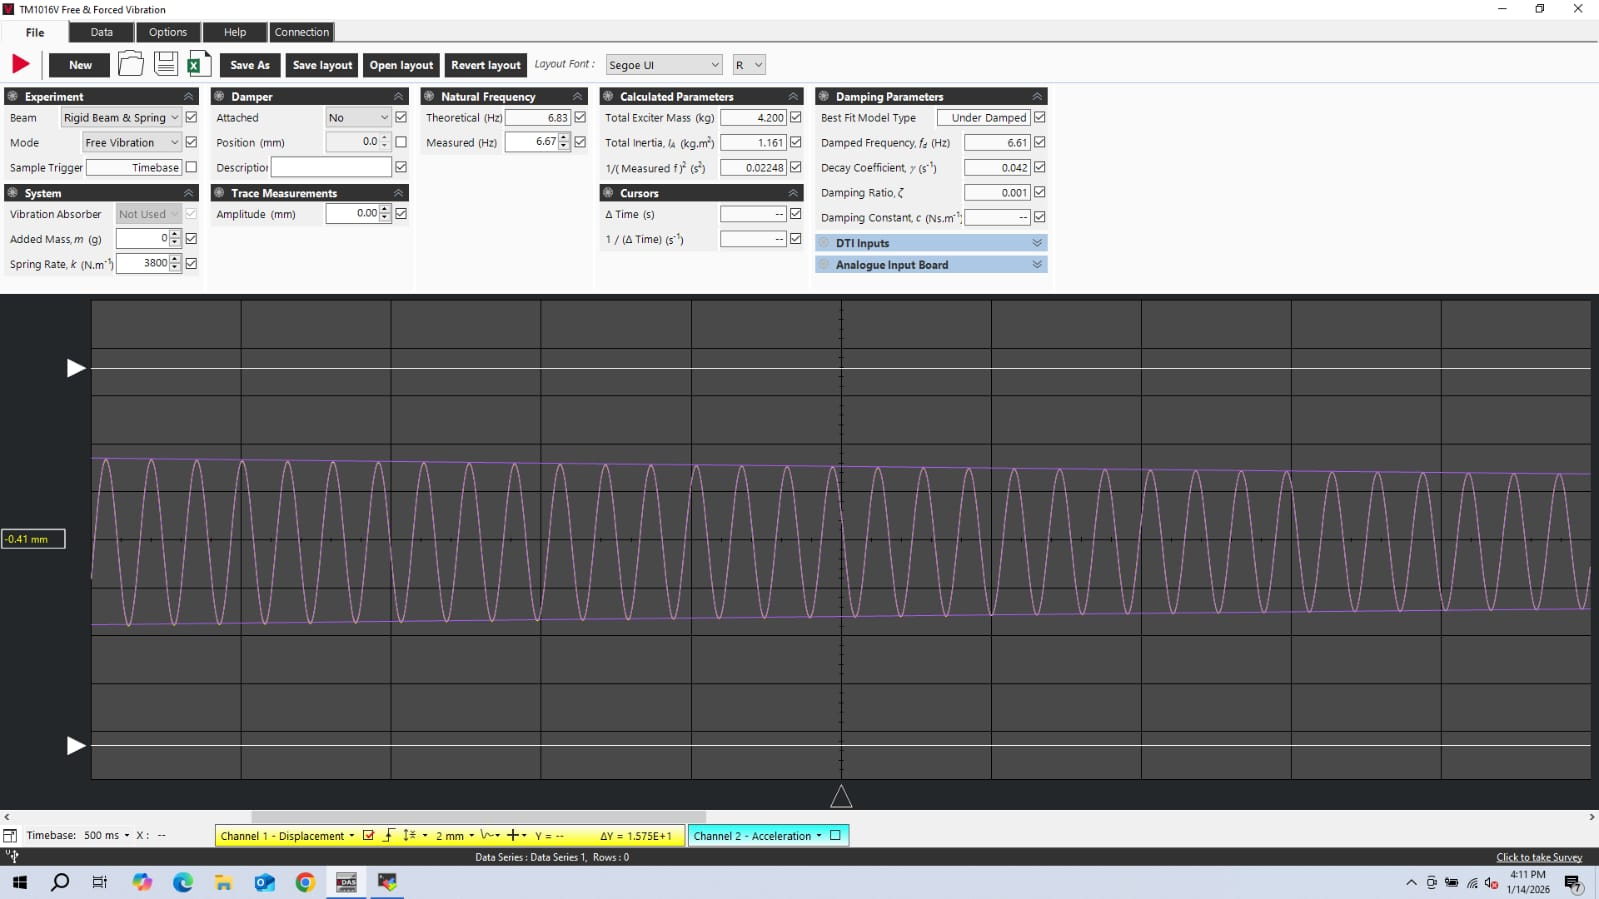

Figure 2: Experimented unforced response of the beam with damper atached(Fully open).

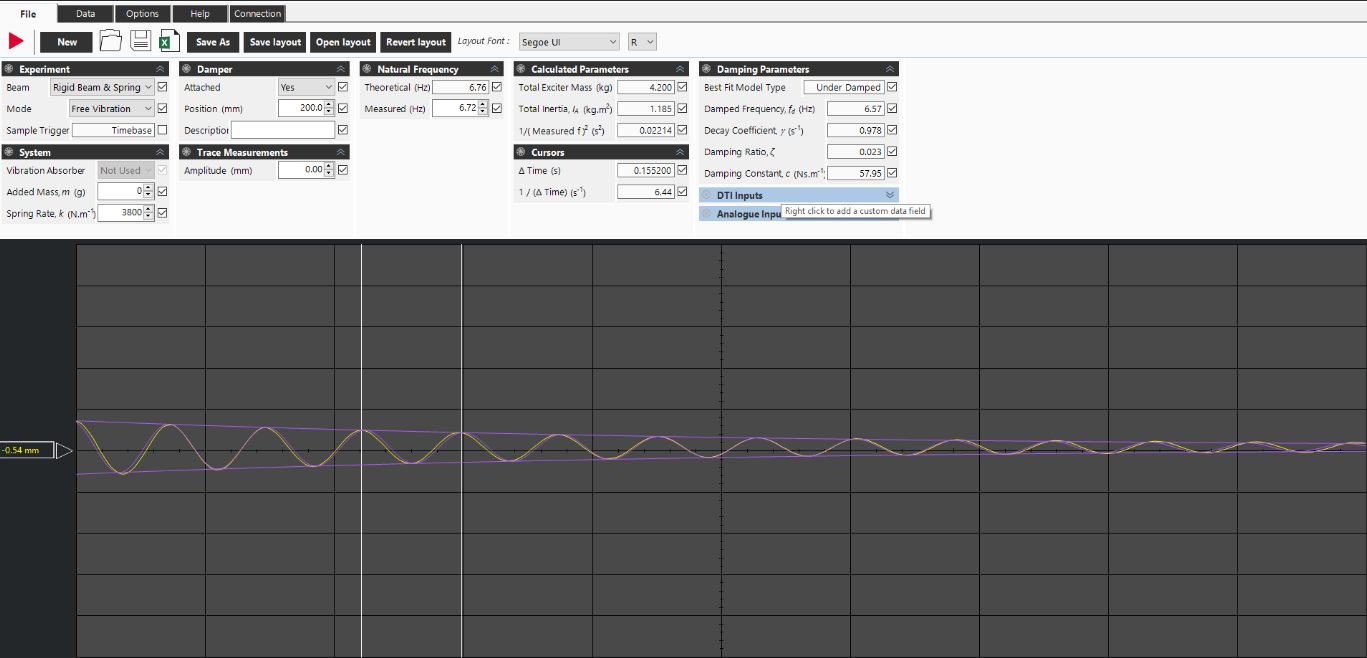

In [5]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ==========================================================
# 1. SYSTEM PARAMETERS
# ==========================================================

# Beam Properties
L = 0.815
m_beam = 1.65
rho_A = m_beam / L
E = 2e11
b, h = 0.025, 0.01
I = (b * h**3) / 12
EI = E * I

# Attachments
ks = 3800
ls = 0.75
ms_eff = 0.1383

me = 4.2
le = 0.4

md = 0.53
ld = 0.2


# ==========================================================
# 2. MODE SHAPE DEFINITIONS
# ==========================================================

# --- Mode 1: Rigid Body Rotation ---
def psi1(x):
    return x / L


# --- Mode 2: First Flexural Mode ---
def characteristic_equation(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

# Solve for first flexural root
betaL_root = brentq(characteristic_equation, 3.5, 4.5)
beta_f = betaL_root / L
sigma_f = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x)

def psi2_dd(x):
    return (beta_f**2) * (-np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x))


# ==========================================================
# 3. HYBRID MASS AND STIFFNESS MATRICES
# ==========================================================

# --- Modal Mass Terms ---

# Mode 1 (Rigid)
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2
M11 = Jo / (L**2)

# Mode 2 (Flexural)
m_beam_part, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)
M22 = (
    m_beam_part
    + ms_eff * psi2(ls)**2
    + me * psi2(le)**2
    + md * psi2(ld)**2
)

# --- Modal Stiffness Terms ---

# Mode 1 (Rigid)
K11 = (ks * ls**2) / (L**2)

# Mode 2 (Flexural)
k_beam_part, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = k_beam_part + ks * psi2(ls)**2


# ==========================================================
# 4. NATURAL FREQUENCIES
# ==========================================================

omega1 = np.sqrt(K11 / M11)
omega2 = np.sqrt(K22 / M22)


# ==========================================================
# 5. DAMPING MATRIX (STIFFNESS-PROPORTIONAL)
# ==========================================================

# Given experimental damping ratio for Mode 1
zeta1 = 0.023

# Stiffness-proportional relationship
zeta2 = zeta1 * (omega2 / omega1)

# Modal damping coefficients
C11 = 2 * zeta1 * omega1 * M11
C22 = 2 * zeta2 * omega2 * M22

C_matrix = np.diag([C11, C22])


# ==========================================================
# 6. OUTPUT RESULTS
# ==========================================================

print("===== NATURAL FREQUENCIES (rad/s) =====")
print(f"omega1 (Rigid)    = {omega1:.4f}")
print(f"omega2 (Flexural) = {omega2:.4f}")

print("\n===== DAMPING RATIOS =====")
print(f"zeta1 (Rigid)    = {zeta1:.4f}")
print(f"zeta2 (Flexural) = {zeta2:.4f}")

print("\n===== HYBRID MATRICES =====")
print(f"M = diag({M11:.4f}, {M22:.4f})")
print(f"K = diag({K11:.2f}, {K22:.2f})")
print(f"C = diag({C11:.4f}, {C22:.4f})")

print("\nModal Damping Matrix (C):")
print(np.round(C_matrix, 4))


===== NATURAL FREQUENCIES (rad/s) =====
omega1 (Rigid)    = 43.3714
omega2 (Flexural) = 149.0965

===== DAMPING RATIOS =====
zeta1 (Rigid)    = 0.0230
zeta2 (Flexural) = 0.0791

===== HYBRID MATRICES =====
M = diag(1.7107, 4.2735)
K = diag(3218.04, 94998.54)
C = diag(3.4131, 100.7561)

Modal Damping Matrix (C):
[[  3.4131   0.    ]
 [  0.     100.7561]]


Activity #**3**

### Mathematical Derivation of the Hybrid 2DOF Free Response

In the hybrid 2DOF model, the transverse displacement of the beam is approximated using two basis functions:

- Rigid body rotation: $\psi_1(x)$  
- First flexural bending mode: $\psi_2(x)$  

The displacement field is

$$
y(x,t) = \psi_1(x) z_1(t) + \psi_2(x) z_2(t)
$$

---

## 1. Modal Equations of Motion

The decoupled modal equations (with diagonal damping matrix $C$) are

$$
M_{ii}\ddot{z}_i(t) + C_{ii}\dot{z}_i(t) + K_{ii} z_i(t) = 0,
\qquad i = 1,2
$$

Dividing by $M_{ii}$:

$$
\ddot{z}_i + \frac{C_{ii}}{M_{ii}}\dot{z}_i + \frac{K_{ii}}{M_{ii}} z_i = 0
$$

Define the natural frequency

$$
\omega_i = \sqrt{\frac{K_{ii}}{M_{ii}}}
$$

and damping ratio

$$
\zeta_i = \frac{C_{ii}}{2 M_{ii} \omega_i}
$$

The equation becomes the standard second-order form:

$$
\ddot{z}_i + 2\zeta_i \omega_i \dot{z}_i + \omega_i^2 z_i = 0
$$

---

## 2. Free Response Solution (Underdamped Case)

For $\zeta_i < 1$, define the damped natural frequency

$$
\omega_{d,i} = \omega_i \sqrt{1 - \zeta_i^2}
$$

The modal response is

$$
z_i(t)
=
e^{-\zeta_i \omega_i t}
\left[
z_i(0)\cos(\omega_{d,i} t)
+
\frac{\dot{z}_i(0) + \zeta_i \omega_i z_i(0)}{\omega_{d,i}}
\sin(\omega_{d,i} t)
\right]
$$

---

## 3. Initial Conditions (Displacement at $x = l_s$)

We apply an initial displacement $y_0$ at the spring location $x = l_s$ with

$$
\dot{z}_i(0) = 0
$$

Assume the beam initially takes the static deflection shape caused by a point force $F$ applied at $x = l_s$.

The modal initial coordinates are

$$
z_i(0) = \frac{F \, \psi_i(l_s)}{K_{ii}}
$$

The total displacement at $l_s$ is

$$
y(l_s,0)
=
\sum_{j=1}^{2} \psi_j(l_s) z_j(0)
$$

Substituting:

$$
y(l_s,0)
=
F \left(
\frac{\psi_1(l_s)^2}{K_{11}}
+
\frac{\psi_2(l_s)^2}{K_{22}}
\right)
$$

Since $y(l_s,0) = y_0$, we solve for $F$:

$$
F =
\frac{y_0}
{\frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}}}
$$

Substituting back into $z_i(0)$ gives

$$
z_i(0)
=
\frac{y_0 \, \psi_i(l_s) / K_{ii}}
{\frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}}}
$$

---

This expression correctly distributes the imposed displacement $y_0$ across both hybrid modes.


In [6]:
# ==========================================================
# HYBRID 2DOF FREE RESPONSE ANIMATION
# ==========================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


# ==========================================================
# 1️⃣  CONFIGURATION
# ==========================================================

y0 = 0.01          # Initial displacement at spring location (ls)
t_final = 25
fps = 30

t_vals = np.linspace(0, t_final, int(t_final * fps))
x_plot = np.linspace(0, L, 100)


# ==========================================================
# 2️⃣  INITIAL MODAL CONDITIONS
# ==========================================================

# Denominator from derived expression
denom = (psi1(ls)**2 / K11) + (psi2(ls)**2 / K22)

# Modal initial displacements
z1_0 = (y0 * psi1(ls) / K11) / denom
z2_0 = (y0 * psi2(ls) / K22) / denom

# Zero initial velocity
zd1_0 = 0
zd2_0 = 0


# ==========================================================
# 3️⃣  MODAL RESPONSE FUNCTION
# ==========================================================

def modal_response(z0, zd0, omega, zeta, t):
    wd = omega * np.sqrt(1 - zeta**2)
    envelope = np.exp(-zeta * omega * t)

    cos_term = z0 * np.cos(wd * t)
    sin_term = ((zd0 + zeta * omega * z0) / wd) * np.sin(wd * t)

    return envelope * (cos_term + sin_term)


# Compute modal coordinates over time
z1_t = modal_response(z1_0, zd1_0, omega1, zeta1, t_vals)
z2_t = modal_response(z2_0, zd2_0, omega2, zeta2, t_vals)


# ==========================================================
# 4️⃣  PRECOMPUTE SPATIAL MODE SHAPES
# ==========================================================

psi1_x = psi1(x_plot)
psi2_x = psi2(x_plot)

# Precompute modal values at spring location (avoids recomputation in loop)
psi1_ls = psi1(ls)
psi2_ls = psi2(ls)


# ==========================================================
# 5️⃣  ANIMATION SETUP
# ==========================================================

fig, ax = plt.subplots(figsize=(10, 5))

line, = ax.plot([], [], lw=2, label='Beam Displacement')
spring_point, = ax.plot([], [], 'ro', markersize=8,
                        label='Spring Location ($l_s$)')

ax.set_xlim(0, L)
ax.set_ylim(-1.5 * y0, 1.5 * y0)
ax.set_xlabel('Beam Position $x$ (m)')
ax.set_ylabel('Displacement $y$ (m)')
ax.set_title('Free Response of Hybrid 2DOF System')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper right')

time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes,
                    fontweight='bold')


# ==========================================================
# 6️⃣  ANIMATION FUNCTIONS
# ==========================================================

def init():
    line.set_data([], [])
    spring_point.set_data([], [])
    time_text.set_text('')
    return line, spring_point, time_text


def animate(i):

    # Total displacement reconstruction
    y_vals = psi1_x * z1_t[i] + psi2_x * z2_t[i]

    # Displacement at spring location
    y_ls = psi1_ls * z1_t[i] + psi2_ls * z2_t[i]

    line.set_data(x_plot, y_vals)
    spring_point.set_data([ls], [y_ls])
    time_text.set_text(f'Time: {t_vals[i]:.2f} s')

    return line, spring_point, time_text


# ==========================================================
# 7️⃣  GENERATE ANIMATION
# ==========================================================

ani = FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=len(t_vals),
    interval=1000 / fps,
    blit=True
)

plt.close()


# ==========================================================
# 8️⃣  SAVE OUTPUT
# ==========================================================

# Save as MP4 (requires ffmpeg in Colab)
ani.save('vibration_response.mp4', writer='ffmpeg', fps=fps)

# Alternative (if ffmpeg not available):
# ani.save('vibration_response.gif', writer='pillow', fps=fps)
